# DenseNet(Densely Connected Convolutional Networks)

DenseNet은 CNNs의 성능을 크게 향상시킨 방법론이고, CNN계열 모델에 비해 더 적은 파라미터로 높은 성능을 유지함

주요 방법론
1. **Dense Connections (Dense 연결)** : DenseNet은 각 레이어가 이전의 모든 레이어로부터 입력을 받아 자신의 출력을 다음 모든 레이어로 전달. 이를 통해 정보 흐름을 촉진, gradient vanishing(그레디언트 소실) 문제를 완화, Feature Map의 재사용성을 높임
2. **Composite Function (합성 함수)** : 레이어의 구성은 BM, ReLU, Conv로 된 합성함수를 사용
3. **Growth Rate(성장률)** : 각 레이어는 고정된 수의 특징 맵(Feature Map를 growth rate)라 부름 -> 레이어에서 Feature Map를 여러개 출력하는 것으로 보임
4. **Bottleneck Layers and Compression** : 모델의 효율성을 높이기 위한 Bottleneck layers (1x1 convolutions)과 Transition layers를 도입 -> 채널 수를 줄이는 효과를 만듬
5. **Feature Reuse(특징 재사용)** : DenseNet는 Dense라는 연결을 통해서 여러 레이어에서 동일한 특징을 재사용 -> 파마리터 효율성을높이고 학습을 가속화함

DenseNet은 ResNet과 Pre-Activation ResNet보다 적은 파라미터 수로 더 높은 성능을 가진 모델임
-> 주요한 방법론 : DensNet은 모든 레이어의 피쳐맵을 연결 -> 이전 레이어에서 발생한 피쳐맵을 다음 레이어에서 발성한 피쳐맵에 연결하는 방식임 
--> 이때 연결방식이 ResNet는 단순덧셈이라면, DenseNet는 concatenate(연결)로 수행함 -> 주의할 점 : 연결에 사용되는 피쳐맵은 크기가 동일해야함

###이렇게 feature Map를 연결하는 장점

1. strong gradient flow와 information flow를 갖습니다. 이는 기울기 소실 문제를 완화하고 feature reuse 효과가 있음

기존 CNN  (n-1)레이어 -> 피처맵 -> (n)레이어  이런식으로 이전 레이어의 출력(피처맵)이 다믕 레이어의 입력으로 쓰임
-> 레이어가 길어지면 처음 레이어의 피쳐맵 정보는 아에 소실됨 -> 이걸 **feature reuse 문제** 라 부름
-> DenseNet은 처음 레이어의 출력인 피처맵을 마지막 레이어의 피처맵에 연결해서 정보 소실을 방지함
-> 따라서 오차 역전파 진행에 발생하는 gradient vanishing(그레디언트 소실) 문제를 완화시킬 수 있음

2. 파라미터 수가 적고, 연산량도 적음 : DenseNet는 애초에 적은 채널 수를 이용함

## DenseNet의 아이디어 설명

일단 DenseNet은 ResNet을 응용한 모델인 듯 함
Resnet 기준으로 설명하자면 $i$번째 레이어의 출력값은 </br>$\mathbf{x}_\ell = H_\ell (\mathbf{x}_{\ell-1}) + \mathbf{x}_{\ell-1}$ 으로 수식화 할 수 있다.</br>
이때 $H_\ell()$ 이 부분은 레이어(Conv - BN - Relu의 조합)이 되며, $x_{\ell-1}$는 Skip connection결과값이다</br>
즉, ResNet은 이전 레이어의 출력값과 현재 레이어의 출려값을 합산하는 형식이다 -> 이렇게 덧셈 형식으로 결합되는 출력은 신경망에서 information flow의 지연 문제를 야기할 수 있다.


이걸 **Dense Connectivity**라는 아이디어로 아래의 수식으로 개선을 했다.
$$\mathbf{x}_\ell = H_\ell([\mathbf{x}_0, \mathbf{x}_1, \ldots, \mathbf{x}_{\ell-1}])$$

-> 그런데 이렇게 이전레이어 값을 계속 복리 형식으로 사용하면 문제가 있지 않나...</br>
--> 네트워크가 깊어질 수록 레이어 출력의 저장량이 많아져서 메모리 사용량이 늘어남, 계산 복잡성도 커짐</br>
--> 따라서 구조상 모델의 크기가 제한될 수 밖에 없음</br>
----> 이를 DenseNet 에서는 Bottleneck Layers, Compression, Efficient Implementation의 기법을 도입해서 미봉함</br>


아무튼 위 Dense Connectivity 연산을 수행하기 위한  연결(concatenation) 연산의 전제조건은 출력인 Feature Map의 크기가 모두 같아야 한다는 것임</br>
-> 근데 pooling 을 레이어에 적용하면 Feature Map의 크기가 줄어듬

그래서 **Dense Block**라는 개념을 도입함
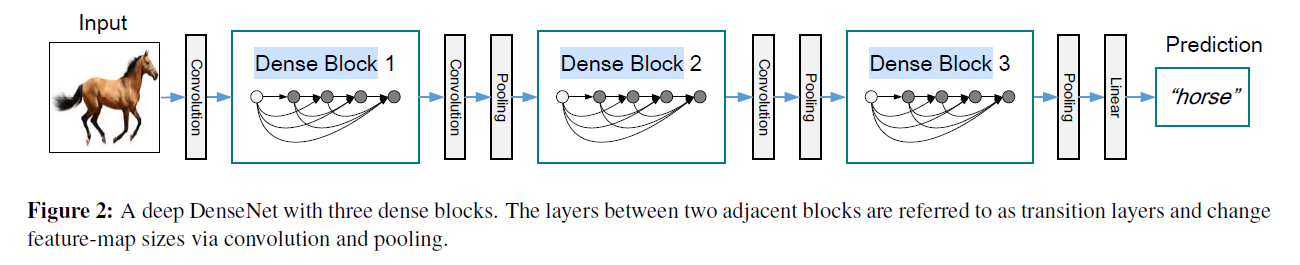

Dense Block은 여러 레이어로 구성되어 있음, Dense Block과 Dense Block사이에는 transition layer를 배치</br>
-> transition layer는 Pool, BN을 수행함, transition layer에는 theta라는 하이퍼 파라미터가 배치되어 있음</br>
--> theta 파라미터가 채널 수를 조정하는 값임</br>
---> Feature Map의 크기를 계속 같게 유지하는 방법은 Conv에서 커널을 잘 설계해서 넣은거임 ㅋㅋ


### Growth rate
Dense Block 내의 레이어는 k개의 피쳐 맵이 생성되는데 이 K값이 Growth Rate임</br>
-> $\ell^{\text{th}}$번째 레이어는 $k_0 + k \times (\ell - 1)$의 입력값을 갖게 됨</br>
-> $k_0$ : 입력 레이어의 채널 수, $k$ : 12


### Bottleneck layers
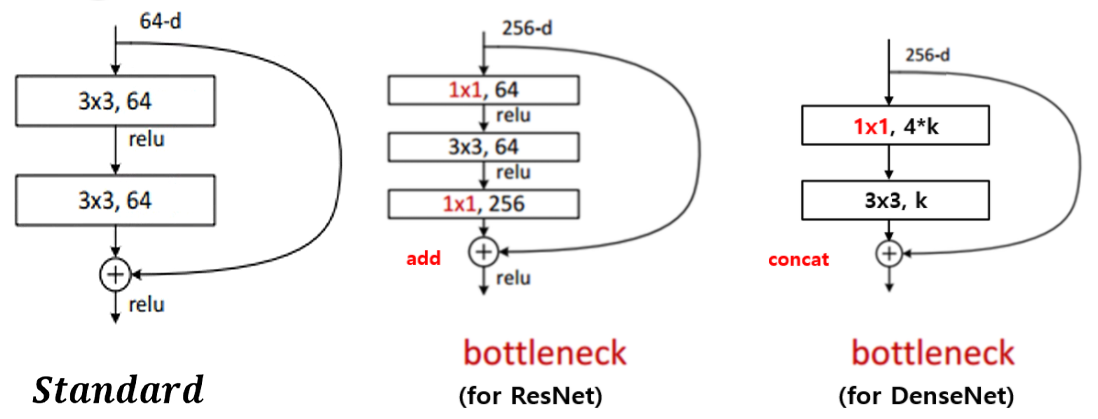

왼쪽부터 버틀넥 구조 없음(Skip connection, 혹은 Residual block라 부름), ResNet버틀넥, DenseNet버틀넥임

일단 사전 지식이 필요한데 이건 Conv의 파라미터이다</br>
Convolution Parameters = Kernel Size(가로) X Kernel Size(세로) X Input Channel수 X Output Channel수

여기서 1x1 Convolution을 적용했다는 것은 1x1 X 인풋채널 X 아웃풋 채널 의 파라미터가 나온다는 것이고
-> 이는 연산량을 줄여주는 효과를 냄 -> 좀더 정확히는 채널은 증가하지만 전체 파라미터 개수는 줄어듬

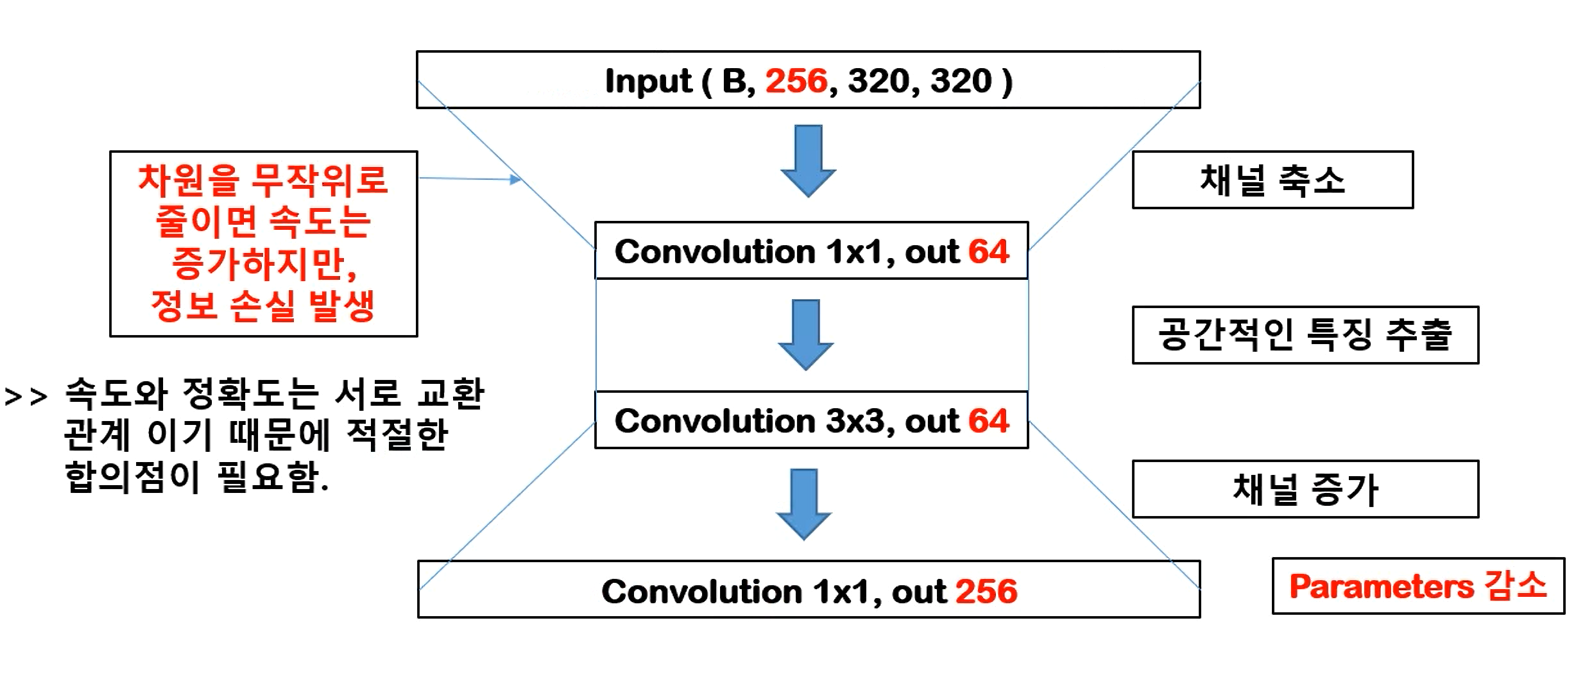

아무튼 DenseNet는 좀 더 특이한 Bottleneck layer을 도입해서 적절한 피쳐맵, 채널개수를 만든다 보면 된다

## 6. DenseNet architecture

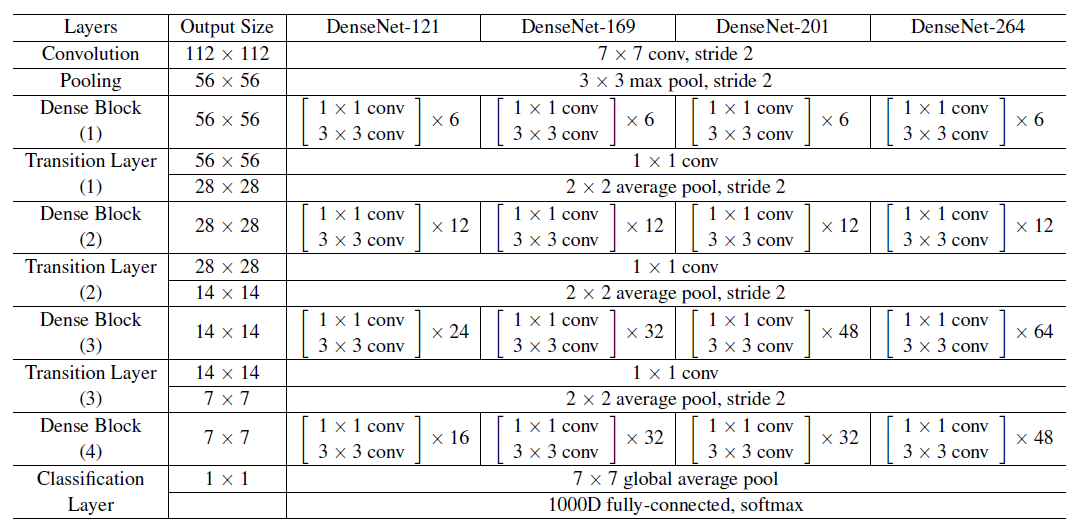

DenseNet은 총 사용되는 Dense block개수에 따라 총 4가지 버전을 만들고 실험을 수행함 
-> 실험한 DenseNet에서 K(Growth rate)는 32를 씀

### Composite Function

DenseNet은 ResNet의 구조에 대해 분석한 “Identity mappings in deep residual networks, 2016 ECCV” 논문에서 실험을 통해 제안한 BatchNorm-ReLU-Conv 순서의 pre-activation 구조를 사용하였다.
-> Dense connectivity의 또다른 표현법임....


### Compression

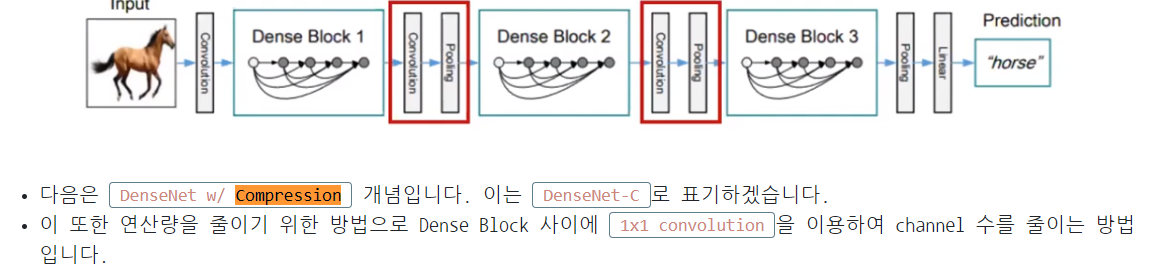

위 사진처럼 Dense Block 사이사이에 박아넣은 1x1 Conv를 활용하는게 DenseNet - Compression기법임
-> 아무튼 간단하게 채널 수를 줄이는 것으로 DenseBlock에서 출력된 채널이 $m$이라면, 여기에 0~1사이의 값을 갖는 $\theta$를 곱해서 채널 수를 줄인다 보면 됨(논문에서는 0.5를 씀)
저거랑 Pooling까지 합친 붉은색 박스가 **Transition layer**에 해당함



## Implementation Details(모델 학습기의 디테일)

1. **Optimizer (최적화 알고리즘)**: 
   - 모든 DenseNet 모델은 Nesterov 모멘텀을 사용한 Stochastic Gradient Descent (SGD)로 훈련됩니다. 
   - 모멘텀 값은 0.9로 설정하고, weight decay는 1e-4로 설정합니다.

2. **Learning Rate (학습률)**: 
   - 초기 학습률은 0.1로 설정되며, 모델 훈련 중에 학습률을 점진적으로 감소시킵니다. 
   - CIFAR 및 SVHN 데이터셋의 경우, 학습률은 50%의 에폭 동안 0.1에서 0.01로, 그리고 75%의 에폭 동안 0.001로 감소합니다.

3. **Batch Size (배치 크기)**: 
   - 배치 크기는 64로 설정됩니다.

4. **Data Augmentation (데이터 증강)**: 
   - CIFAR와 SVHN 데이터셋의 경우, 학습 이미지에 대해 표준 데이터 증강 기법을 적용합니다. 
   - 여기에는 무작위로 이미지를 좌우 반전시키고, 32x32 패치 크기로 자르는 과정이 포함됩니다.

5. **Weight Initialization (가중치 초기화)**: 
   - 모든 가중치는 He 초기화 방식으로 초기화됩니다. 
   - 이는 ReLU 활성화 함수에 최적화된 방법입니다.

6. **Model Variants (모델 변형)**: 
   - 논문에서는 다양한 DenseNet 변형을 제안합니다. 
   - 예를 들어, DenseNet-BC는 Bottleneck 레이어와 압축(compression)을 적용한 변형입니다.


## 모델 설계하기


In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F #이거는 활성화 함수 모듈
import torch.optim as optim #이거는 옵티마이저 함수 모듈

from torchsummary import summary #설계한 모델의 요약본 출력 모듈

### 첫번째로 가장 쉬운 Transition Layer먼저 설계
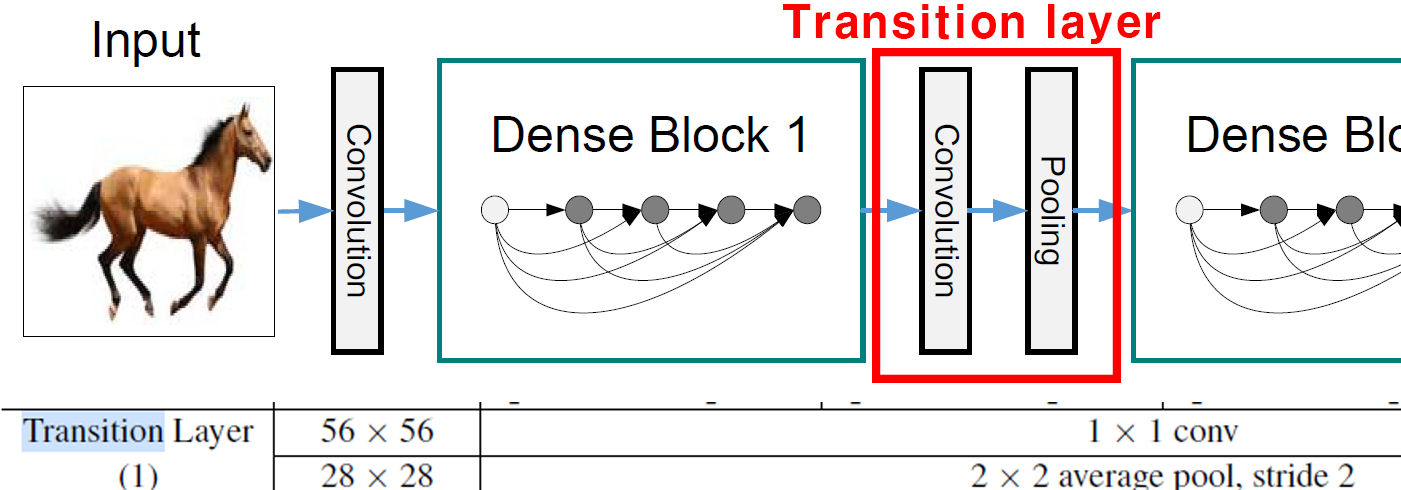

해당 레이어에 적용된 기술 **Compression기법** -> 채널을 감소시키는 conv가 도입된다.


In [2]:
class Transition(nn.Module):
    def __init__(self, in_channels):
        super().__init__()

        self.transition = nn.Sequential(
            nn.BatchNorm2d(in_channels), #배치 정규화
            nn.ReLU(),
            nn.Conv2d(in_channels, in_channels//2, kernel_size=1, bias=False),
            #입력채널을 반갈죽 
            nn.AvgPool2d(kernel_size=2, stride=2),    # Reduce feature map size
        )
    
    def forward(self, x):
        return self.transition(x)

### Dense Block의 기본 구성요소인 Bottleneck 설계

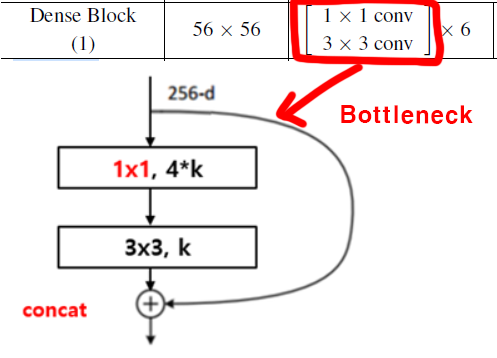

Dense block는 기본 구성요소인 Bottleneck가 연쇄해서 붙은 것이다. 여기서 $k$는 growth rate이다


In [3]:
class Bottleneck(nn.Module):
    def __init__(self, in_channels, growth_rate):
        super().__init__()

        self.bottleneck = nn.Sequential(
            nn.BatchNorm2d(in_channels),
            nn.ReLU(),
            nn.Conv2d(in_channels, out_channels=4*growth_rate, kernel_size=1, bias=False),
            nn.BatchNorm2d(4*growth_rate),
            nn.ReLU(),
            nn.Conv2d(in_channels=4*growth_rate, out_channels=growth_rate, 
                      kernel_size=3, padding=1, bias = False),
        )
        
    def forward(self, x):
        return torch.cat([x, self.bottleneck(x)], dim=1)
                        #이전레이어 출럭, 현재 레이어 출력 이케 연결하게 하는게 더 중요함
                        #사실 큰 의미는 없는데 논문에서 작성한 수식대로 쓰자

### 이제 Dense Block 설계하기

In [4]:
class DenseBlock(nn.Module):
    def __init__(self, num_blocks, in_channels, growth_rate, last_stage=False):
        super().__init__()
        self.layers = nn.ModuleList()
        #파이토지에서 리스트 처럼 동작하면서 nn.Module속성을 갖는 컨테이너임
        #여러 레이어를 하나의 리스트에 저장 가능
        self.dense_channels = in_channels

        for _ in range(num_blocks):
            layer = Bottleneck(self.dense_channels, growth_rate)
            self.layers.append(layer)
            self.dense_channels += growth_rate

        if last_stage:
            self.layers.append(nn.BatchNorm2d(self.dense_channels))
            self.layers.append(nn.ReLU())
        else:
            self.layers.append(Transition(self.dense_channels))
            assert self.dense_channels % 2 == 0
            self.dense_channels //= 2

    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

### 위 설계한 3개의 소분된 클래스를 다 받아서 DenseNet의 기본 뼈대 설계하기

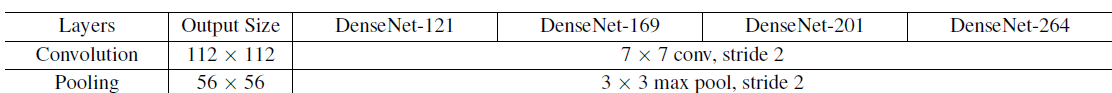

DenseNet의 머리부분 파라미터 잘 확인하자

In [5]:
class DenseNet(nn.Module): #n_classes는 인자를 따로 안주면 기본은 1000이다
    def __init__(self, block_list, growth_rate, n_classes=1000): 
        super().__init__()

        assert len(block_list) == 4
        #block_list의 길이가 4가 아니라면, 프로그램은 AssertionError를 발생시키고 중단

        self.growth_rate = growth_rate

        self.conv1 = nn.Sequential( #DenseNet의 머리 부분
            nn.Conv2d(3, 2 * self.growth_rate, 7, stride=2, padding=3, bias=False),
            nn.BatchNorm2d(2 * self.growth_rate),
            nn.ReLU(),
        )
        self.maxpool = nn.MaxPool2d(3, stride=2, padding=1)

        self.dense_channels = 2 * self.growth_rate


        #여기 부분은 코드 이해가 좀 필요하다...
        dense_blocks = []
        dense_blocks.append(DenseBlock(block_list[0], self.dense_channels, self.growth_rate))
        self.dense_channels = dense_blocks[-1].dense_channels
        dense_blocks.append(DenseBlock(block_list[1], self.dense_channels, self.growth_rate))
        self.dense_channels = dense_blocks[-1].dense_channels
        dense_blocks.append(DenseBlock(block_list[2], self.dense_channels, self.growth_rate))
        self.dense_channels = dense_blocks[-1].dense_channels
        dense_blocks.append(DenseBlock(block_list[3], self.dense_channels, self.growth_rate, last_stage=True))
        self.dense_channels = dense_blocks[-1].dense_channels
        self.dense_blocks = nn.Sequential(*dense_blocks)


        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(self.dense_channels, n_classes)

    def forward(self, x):
        x = self.conv1(x)
        x = self.maxpool(x)
        x = self.dense_blocks(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)
        return x

기본 뼈대를 만들었으니 이제 뼈대를 가지고 논문에서 제시한 DenseNet_121, 169, 201, 264 함수 만들기

In [6]:
def DenseNet121(n_classes=1000):
    return DenseNet(block_list=[6, 12, 24, 16], growth_rate=32, n_classes=n_classes)

def DenseNet169(n_classes=1000):
    return DenseNet(block_list=[6, 12, 32, 32], growth_rate=32, n_classes=n_classes)

def DenseNet201(n_classes=1000):
    return DenseNet(block_list=[6, 12, 48, 32], growth_rate=32, n_classes=n_classes)

def DenseNet264(n_classes=1000):
    return DenseNet(block_list=[6, 12, 64, 48], growth_rate=32, n_classes=n_classes)

In [7]:
##설계한 모델이 잘 동작하는지 검증만 하기
debug_model_1 = DenseNet264()
summary(debug_model_1, input_size=(3, 224, 224), device="cpu")
#RGB채널, 이미지크기 순이다

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
       BatchNorm2d-5           [-1, 64, 56, 56]             128
              ReLU-6           [-1, 64, 56, 56]               0
            Conv2d-7          [-1, 128, 56, 56]           8,192
       BatchNorm2d-8          [-1, 128, 56, 56]             256
              ReLU-9          [-1, 128, 56, 56]               0
           Conv2d-10           [-1, 32, 56, 56]          36,864
       Bottleneck-11           [-1, 96, 56, 56]               0
      BatchNorm2d-12           [-1, 96, 56, 56]             192
             ReLU-13           [-1, 96, 56, 56]               0
           Conv2d-14          [-1, 128,

### 설계한 모델에 대한 디버깅과정을 마쳣다 </br>-> 데이터 불러와서 학습시켜보자

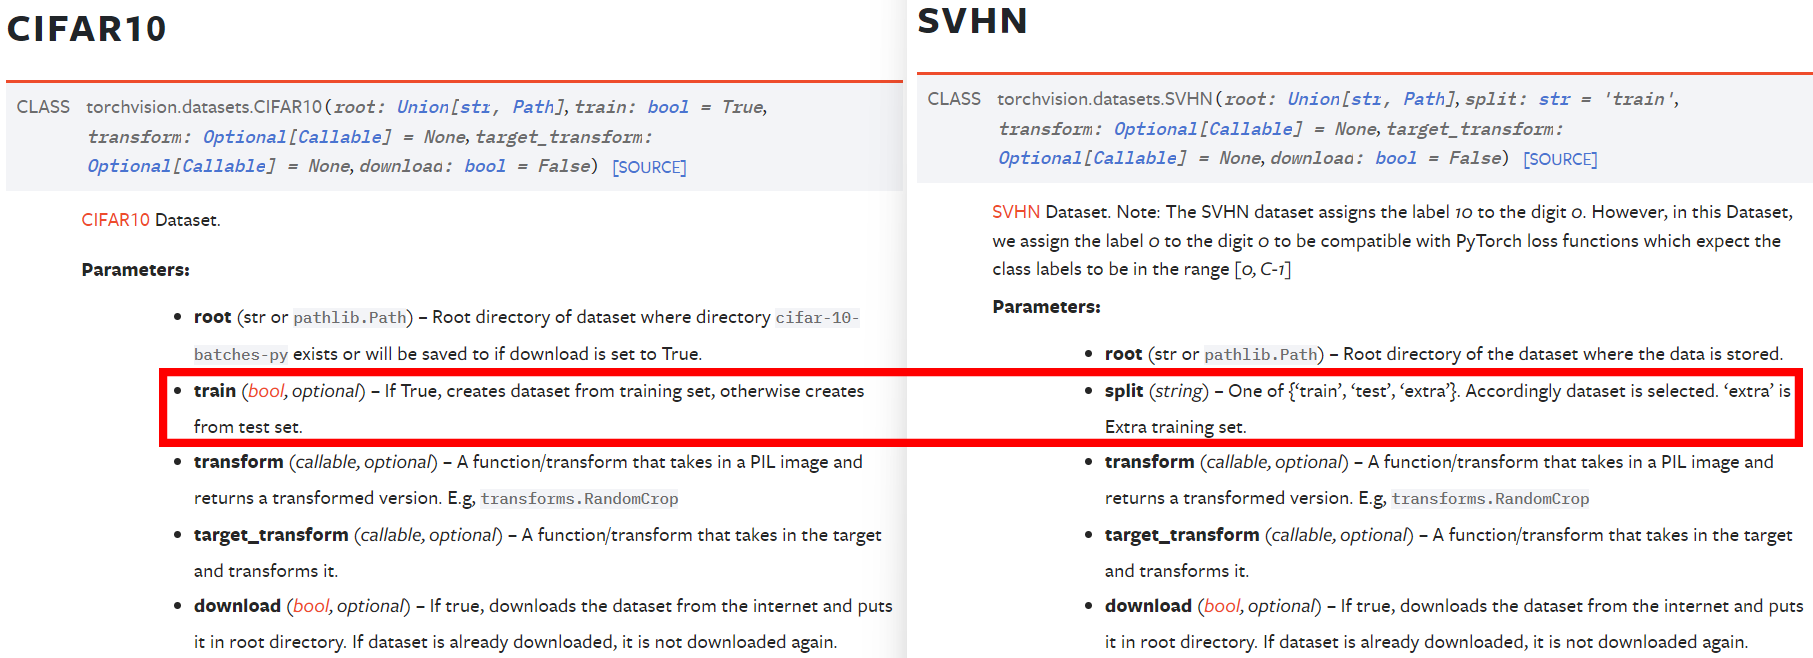

데이터 셋마다 인자값 확인하자...

In [8]:
## 데이터셋 가져오기

import torchvision #예제 이미지 데이터셋이 모여있는 모듈
from torchvision import datasets, transforms

train_raw_data = datasets.SVHN(root="data", 
                              split='train', 
                              download=True, 
                              transform=transforms.ToTensor())
test_raw_data = datasets.SVHN(root="data", 
                              split='test', 
                              download=True, 
                              transform=transforms.ToTensor())

Using downloaded and verified file: data\train_32x32.mat
Using downloaded and verified file: data\test_32x32.mat


In [10]:
import numpy as np

#이미지 전처리11 : RGB채널별 평균/표준편차 계산 함수 설계
def normal_parm_func(input_data):

    meanRGB = [np.mean(x.numpy(), axis=(1,2)) for x, _ in input_data]
    stdRGB = [np.std(x.numpy(), axis=(1,2)) for x, _ in input_data]

    RGB_mean_list, RGB_std_list = [], []

    for i in range(3):
        RGB_mean_list.append(
            np.mean([m[i] for m in meanRGB])
        )
        RGB_std_list.append(
            np.mean([s[i] for s in stdRGB])
        )

    return RGB_mean_list, RGB_std_list


proc_train_data = normal_parm_func(train_raw_data)
proc_test_data = normal_parm_func(test_raw_data)

print(f"Train Mean: {[format(m, '.3f') for m in proc_train_data[0]]}, \
      Train Std: {[format(s, '.3f') for s in proc_train_data[1]]}")
print(f"Test Mean: {[format(m, '.3f') for m in proc_test_data[0]]}, \
      Test Std: {[format(s, '.3f') for s in proc_test_data[1]]}")

Train Mean: ['0.438', '0.444', '0.473'],       Train Std: ['0.120', '0.123', '0.105']
Test Mean: ['0.452', '0.452', '0.469'],       Test Std: ['0.122', '0.128', '0.114']


3. **Batch Size (배치 크기)**: 
   - 배치 크기는 64로 설정됩니다.

4. **Data Augmentation (데이터 증강)**: 
   - CIFAR와 SVHN 데이터셋의 경우, 학습 이미지에 대해 표준 데이터 증강 기법을 적용합니다. 
   - 여기에는 무작위로 이미지를 좌우 반전시키고, 32x32 패치 크기로 자르는 과정이 포함됩니다.

In [11]:
#이미지 전처리 2

#이미지 변환방식이 저장된 객체 생성
train_transformation = transforms.Compose([
    transforms.ToTensor(), 
    #입력하려는 train_raw데이터가 텐서 자료형이지만
    #이걸 안써주면 PIL자료형이 되버림...
    transforms.RandomResizedCrop((224, 224)), #Inception_V3 입력 이미지는 299 299 3임
    #참고로 그냥 Resize하지 말고 이번에는 랜덤으로 Crop한 후의 이미지를 Resize해보자
    # 무작위 좌우 반전
    transforms.RandomHorizontalFlip(),
    # 무작위 32x32 패치 크기로 자르기
    transforms.RandomCrop(32, padding=4),
    transforms.Normalize(mean=proc_train_data[0], std=proc_train_data[1])
    #훈련데이터의 평균, 표준편차 입력
])
test_transformation = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((224, 224)), #Inception_V3 입력 이미지는 299 299 3임
    transforms.Normalize(mean=proc_train_data[0], std=proc_train_data[1])
    #훈련데이터의 평균, 표준편차 입력
])

#이미지에 위 변환방식을 적용
train_raw_data.transform = train_transformation
test_raw_data.transform = test_transformation

#데이터 로더 생성 -> 여기서 Batch_size를 정의함
train_loader = torch.utils.data.DataLoader(train_raw_data, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_raw_data, batch_size=64, shuffle=False)

In [12]:
#데이터로더 속성정보 출력 함수
#위 설정한 변수의 속성정보 출력하기
def count_images_and_labels(loader):
    num_images = 0
    label_set = set()
    for data, labels in loader:
        num_images += data.size(0)
        label_set.update(labels.tolist())
    
    return num_images, len(label_set)


train_images, train_label_count = count_images_and_labels(train_loader)
test_images, test_label_count = count_images_and_labels(test_loader)

print(f"Training Images: {train_images}, Unique Labels: {train_label_count}")
print(f"Testing Images: {test_images}, Unique Labels: {test_label_count}")


Training Images: 73257, Unique Labels: 10
Testing Images: 26032, Unique Labels: 10


In [13]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

# CUDA가 사용 가능한 경우, 추가 정보 출력
if device.type == 'cuda':
    print(f"GPU Name: {torch.cuda.get_device_name(0)}")
    print(f"GPU Capability: {torch.cuda.get_device_capability(0)}")
    print(f"Total Memory: {torch.cuda.get_device_properties(0).total_memory / (1024 ** 3):.2f} GB")  # GB 단위로 변환
    print(f"Number of GPUs: {torch.cuda.device_count()}")

cuda
GPU Name: NVIDIA GeForce RTX 4090
GPU Capability: (8, 9)
Total Memory: 23.99 GB
Number of GPUs: 1


In [14]:
ex_model = DenseNet264(n_classes=train_label_count) #클래스 개수는 꼭 넣어주자...
ex_model.to(device)

#설계한 모델이 정상동작하는지 확인하는 코드
try:
    summary(ex_model, input_size=(3, 224, 224), device='cuda')
except Exception as e:
    print(f"Error occurred during torchsummary execution: {e}")

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
       BatchNorm2d-5           [-1, 64, 56, 56]             128
              ReLU-6           [-1, 64, 56, 56]               0
            Conv2d-7          [-1, 128, 56, 56]           8,192
       BatchNorm2d-8          [-1, 128, 56, 56]             256
              ReLU-9          [-1, 128, 56, 56]               0
           Conv2d-10           [-1, 32, 56, 56]          36,864
       Bottleneck-11           [-1, 96, 56, 56]               0
      BatchNorm2d-12           [-1, 96, 56, 56]             192
             ReLU-13           [-1, 96, 56, 56]               0
           Conv2d-14          [-1, 128,

1. **Optimizer (최적화 알고리즘)**: 
   - 모든 DenseNet 모델은 Nesterov 모멘텀을 사용한 Stochastic Gradient Descent (SGD)로 훈련됩니다. 
   - 모멘텀 값은 0.9로 설정하고, weight decay는 1e-4로 설정합니다.

2. **Learning Rate (학습률)**: 
   - 초기 학습률은 0.1로 설정되며, 모델 훈련 중에 학습률을 점진적으로 감소시킵니다. 
   - CIFAR 및 SVHN 데이터셋의 경우, 학습률은 50%의 에폭 동안 0.1에서 0.01로, 그리고 75%의 에폭 동안 0.001로 감소합니다.

In [15]:
criterion = nn.CrossEntropyLoss(reduction='mean') #로스함수는 CEL 사용
optimizer = optim.SGD(ex_model.parameters(), lr=0.1, momentum=0.9, weight_decay=1e-4)

일단 스케줄러 적용 안하고 그냥 깡 훈련함수 쓰기

In [16]:
from tqdm import tqdm #훈련 진행상황 체크

def model_train(model, data_loader, loss_fn, optimizer_fn, processing_device):

    model.train() #모델을 훈련 모드로 설정

    #loss와 accuracy를 계산하기 위한 임시 변수를 생성
    run_size, run_loss, corr = 0, 0, 0

    progress_bar = tqdm(data_loader) #이때 사용되는 데이터는 훈련용 데이터


    for batch_idx, (image, label) in enumerate(progress_bar, start=1):
        #입력된 데이터를 먼저 GPU로 이전하기
        image = image.to(processing_device)
        label = label.to(processing_device)

        #전사과정 수행
        outputs = model(image) #출력이 2개 나온다.

        loss = loss_fn(outputs, label)

        #옵티마이저의 Gradient 초기화
        optimizer_fn.zero_grad()

        #backward 과정 수행
        loss.backward() #Backprogration을 진행하여 Gradient계산
        optimizer_fn.step() #계산된 gradient(모델 파라미터)를 업데이트


        #여기부터는 학습이 잘 되고 있는지 확인하는 부분
        _, pred = outputs.max(dim=1)
        corr += pred.eq(label).sum().item()
        
        run_loss += loss.item() * image.size(0)
        run_size += image.size(0)
        progress_bar.set_description('[Training] loss: ' + \
                            f'{run_loss / run_size:.4f}, accuracy: ' + \
                            f'{corr / run_size:.4f}')
        
    acc = corr / len(data_loader.dataset)

    return run_loss / len(data_loader.dataset), acc

여기는 평가함수

In [17]:
def model_evaluate(model, data_loader, loss_fn, processing_device):
    model.eval() #모델을 평가 모드로 전환

    #gradient업데이틀를 방지해주자
    with torch.no_grad():

        #여기서도 loss, accuracy 계산을 위한 임시 변수 선언
        run_loss, corr = 0, 0


        for image, label in data_loader: #이때 사용되는 데이터는 평가용 데이터
            #입력된 데이터를 먼저 GPU로 이전하기
            image = image.to(processing_device)
            label = label.to(processing_device)


            #평가 결과를 도출하자
            outputs = model(image)

            _, pred = outputs.max(dim=1)

            
            #모델의 평가 결과 도출 부분
            # 배치의 실제 크기에 맞추어 정확도와 손실을 계산
            corr += torch.sum(pred.eq(label)).item()
            run_loss += loss_fn(outputs, label).item() * image.size(0)

        # 전체 데이터셋에 대한 평균 손실과 정확도 계산
        acc = corr / len(data_loader.dataset)

        return run_loss / len(data_loader.dataset), acc

## 이제 훈련/검증코드 실행부분

In [18]:
min_loss = np.inf
num_epochs = 100
MODEL_NAME = 'DenseNet264'


for epoch in range(num_epochs):
    # Model Training
    # 훈련 손실과 정확도를 반환 받습니다.
    train_loss, train_acc = model_train(ex_model, train_loader, criterion, optimizer, device)

    # 검증 손실과 검증 정확도를 반환 받습니다.
    val_loss, val_acc = model_evaluate(ex_model, test_loader, criterion, device)   
    
    # val_loss 가 개선되었다면 min_loss를 갱신하고 model의 가중치(weights)를 저장합니다.
    if val_loss < min_loss:
        print(f'[INFO] val_loss has been improved from {min_loss:.5f} to {val_loss:.5f}. Saving Model!')
        min_loss = val_loss
        torch.save(ex_model.state_dict(), f'{MODEL_NAME}.pth')
    
    # Epoch 별 결과를 출력합니다.
    print(f'epoch {epoch+1:02d}, loss: {train_loss:.5f}, acc: {train_acc:.5f}, \
          val_loss: {val_loss:.5f}, val_accuracy: {val_acc:.5f}')

  0%|          | 0/1145 [00:00<?, ?it/s]c:\Users\HILS_AMD\AppData\Local\Programs\Python\Python38\lib\site-packages\torch\autograd\graph.py:744: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\cudnn\Conv_v8.cpp:919.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
[Training] loss: 2.6537, accuracy: 0.1813: 100%|██████████| 1145/1145 [03:25<00:00,  5.58it/s]


[INFO] val_loss has been improved from inf to 1405194.18800. Saving Model!
epoch 01, loss: 2.65370, acc: 0.18128,           val_loss: 1405194.18800, val_accuracy: 0.16768


[Training] loss: 2.2400, accuracy: 0.1885: 100%|██████████| 1145/1145 [03:23<00:00,  5.64it/s]


epoch 02, loss: 2.23995, acc: 0.18851,           val_loss: 2235582.19092, val_accuracy: 0.17102


[Training] loss: 2.2398, accuracy: 0.1877: 100%|██████████| 1145/1145 [03:22<00:00,  5.67it/s]


[INFO] val_loss has been improved from 1405194.18800 to 356393.14054. Saving Model!
epoch 03, loss: 2.23983, acc: 0.18767,           val_loss: 356393.14054, val_accuracy: 0.16656


[Training] loss: 2.2396, accuracy: 0.1889: 100%|██████████| 1145/1145 [03:19<00:00,  5.75it/s]


epoch 04, loss: 2.23957, acc: 0.18886,           val_loss: 622070.65124, val_accuracy: 0.15051


[Training] loss: 2.2400, accuracy: 0.1883: 100%|██████████| 1145/1145 [03:18<00:00,  5.78it/s]


epoch 05, loss: 2.24005, acc: 0.18832,           val_loss: 546071.54302, val_accuracy: 0.16925


[Training] loss: 2.2397, accuracy: 0.1879: 100%|██████████| 1145/1145 [03:22<00:00,  5.66it/s]


epoch 06, loss: 2.23973, acc: 0.18793,           val_loss: 689550.95237, val_accuracy: 0.16906


[Training] loss: 2.2403, accuracy: 0.1892: 100%|██████████| 1145/1145 [03:19<00:00,  5.73it/s]


[INFO] val_loss has been improved from 356393.14054 to 49727.71741. Saving Model!
epoch 07, loss: 2.24028, acc: 0.18920,           val_loss: 49727.71741, val_accuracy: 0.17601


[Training] loss: 2.2397, accuracy: 0.1885: 100%|██████████| 1145/1145 [03:22<00:00,  5.66it/s]


epoch 08, loss: 2.23974, acc: 0.18853,           val_loss: 59881.09503, val_accuracy: 0.17563


[Training] loss: 2.2396, accuracy: 0.1892: 100%|██████████| 1145/1145 [03:24<00:00,  5.61it/s]


epoch 09, loss: 2.23957, acc: 0.18921,           val_loss: 162677.60242, val_accuracy: 0.16868


[Training] loss: 2.2398, accuracy: 0.1886: 100%|██████████| 1145/1145 [03:18<00:00,  5.76it/s]


epoch 10, loss: 2.23980, acc: 0.18856,           val_loss: 52958.72809, val_accuracy: 0.16825


[Training] loss: 2.2396, accuracy: 0.1884: 100%|██████████| 1145/1145 [03:18<00:00,  5.77it/s]


[INFO] val_loss has been improved from 49727.71741 to 46468.00787. Saving Model!
epoch 11, loss: 2.23964, acc: 0.18838,           val_loss: 46468.00787, val_accuracy: 0.16192


[Training] loss: 2.2396, accuracy: 0.1886: 100%|██████████| 1145/1145 [03:17<00:00,  5.79it/s]


[INFO] val_loss has been improved from 46468.00787 to 3545.18979. Saving Model!
epoch 12, loss: 2.23963, acc: 0.18857,           val_loss: 3545.18979, val_accuracy: 0.11470


[Training] loss: 2.2397, accuracy: 0.1886: 100%|██████████| 1145/1145 [03:22<00:00,  5.67it/s]


epoch 13, loss: 2.23971, acc: 0.18856,           val_loss: 8979.70266, val_accuracy: 0.11025


[Training] loss: 2.2394, accuracy: 0.1890: 100%|██████████| 1145/1145 [03:20<00:00,  5.71it/s]


[INFO] val_loss has been improved from 3545.18979 to 3128.52168. Saving Model!
epoch 14, loss: 2.23945, acc: 0.18902,           val_loss: 3128.52168, val_accuracy: 0.11444


[Training] loss: 2.2390, accuracy: 0.1882: 100%|██████████| 1145/1145 [03:20<00:00,  5.72it/s]


[INFO] val_loss has been improved from 3128.52168 to 689.55956. Saving Model!
epoch 15, loss: 2.23902, acc: 0.18817,           val_loss: 689.55956, val_accuracy: 0.17021


[Training] loss: 2.2395, accuracy: 0.1869: 100%|██████████| 1145/1145 [03:20<00:00,  5.71it/s]


[INFO] val_loss has been improved from 689.55956 to 451.53951. Saving Model!
epoch 16, loss: 2.23953, acc: 0.18692,           val_loss: 451.53951, val_accuracy: 0.19587


[Training] loss: 2.2394, accuracy: 0.1877: 100%|██████████| 1145/1145 [03:20<00:00,  5.72it/s]


epoch 17, loss: 2.23940, acc: 0.18767,           val_loss: 1084.37590, val_accuracy: 0.16545


[Training] loss: 2.2392, accuracy: 0.1878: 100%|██████████| 1145/1145 [03:20<00:00,  5.70it/s]


[INFO] val_loss has been improved from 451.53951 to 88.31988. Saving Model!
epoch 18, loss: 2.23924, acc: 0.18785,           val_loss: 88.31988, val_accuracy: 0.17048


[Training] loss: 2.2385, accuracy: 0.1888: 100%|██████████| 1145/1145 [03:20<00:00,  5.71it/s]


[INFO] val_loss has been improved from 88.31988 to 56.42563. Saving Model!
epoch 19, loss: 2.23846, acc: 0.18876,           val_loss: 56.42563, val_accuracy: 0.15615


[Training] loss: 2.2379, accuracy: 0.1894: 100%|██████████| 1145/1145 [03:20<00:00,  5.71it/s]


epoch 20, loss: 2.23786, acc: 0.18943,           val_loss: 224.08478, val_accuracy: 0.14594


[Training] loss: 2.2338, accuracy: 0.1981: 100%|██████████| 1145/1145 [03:20<00:00,  5.71it/s]


[INFO] val_loss has been improved from 56.42563 to 2.45860. Saving Model!
epoch 21, loss: 2.23379, acc: 0.19807,           val_loss: 2.45860, val_accuracy: 0.14540


[Training] loss: 2.2315, accuracy: 0.1984: 100%|██████████| 1145/1145 [03:20<00:00,  5.71it/s]


[INFO] val_loss has been improved from 2.45860 to 2.31689. Saving Model!
epoch 22, loss: 2.23147, acc: 0.19841,           val_loss: 2.31689, val_accuracy: 0.17886


[Training] loss: 2.2282, accuracy: 0.2025: 100%|██████████| 1145/1145 [03:20<00:00,  5.71it/s]


epoch 23, loss: 2.22816, acc: 0.20255,           val_loss: 2.37768, val_accuracy: 0.20836


[Training] loss: 2.2261, accuracy: 0.2029: 100%|██████████| 1145/1145 [03:20<00:00,  5.70it/s]


[INFO] val_loss has been improved from 2.31689 to 2.22871. Saving Model!
epoch 24, loss: 2.22609, acc: 0.20289,           val_loss: 2.22871, val_accuracy: 0.20805


[Training] loss: 2.2239, accuracy: 0.2056: 100%|██████████| 1145/1145 [03:19<00:00,  5.73it/s]


[INFO] val_loss has been improved from 2.22871 to 2.22701. Saving Model!
epoch 25, loss: 2.22391, acc: 0.20565,           val_loss: 2.22701, val_accuracy: 0.21623


[Training] loss: 2.2232, accuracy: 0.2053: 100%|██████████| 1145/1145 [03:20<00:00,  5.72it/s]


[INFO] val_loss has been improved from 2.22701 to 2.21654. Saving Model!
epoch 26, loss: 2.22324, acc: 0.20535,           val_loss: 2.21654, val_accuracy: 0.21620


[Training] loss: 2.2211, accuracy: 0.2073: 100%|██████████| 1145/1145 [03:20<00:00,  5.70it/s]


[INFO] val_loss has been improved from 2.21654 to 2.21502. Saving Model!
epoch 27, loss: 2.22107, acc: 0.20730,           val_loss: 2.21502, val_accuracy: 0.22000


[Training] loss: 2.2211, accuracy: 0.2053: 100%|██████████| 1145/1145 [03:21<00:00,  5.69it/s]


epoch 28, loss: 2.22112, acc: 0.20525,           val_loss: 2.22877, val_accuracy: 0.20840


[Training] loss: 2.2225, accuracy: 0.2064: 100%|██████████| 1145/1145 [03:20<00:00,  5.71it/s]


epoch 29, loss: 2.22247, acc: 0.20640,           val_loss: 2.21622, val_accuracy: 0.19891


[Training] loss: 2.2210, accuracy: 0.2074: 100%|██████████| 1145/1145 [03:20<00:00,  5.70it/s]


epoch 30, loss: 2.22096, acc: 0.20737,           val_loss: 2.22140, val_accuracy: 0.21105


[Training] loss: 2.2198, accuracy: 0.2080: 100%|██████████| 1145/1145 [03:20<00:00,  5.71it/s]


epoch 31, loss: 2.21985, acc: 0.20795,           val_loss: 2.21903, val_accuracy: 0.20993


[Training] loss: 2.2206, accuracy: 0.2055: 100%|██████████| 1145/1145 [03:20<00:00,  5.70it/s]


[INFO] val_loss has been improved from 2.21502 to 2.21206. Saving Model!
epoch 32, loss: 2.22061, acc: 0.20547,           val_loss: 2.21206, val_accuracy: 0.22929


[Training] loss: 2.2195, accuracy: 0.2082: 100%|██████████| 1145/1145 [03:20<00:00,  5.72it/s]


epoch 33, loss: 2.21954, acc: 0.20817,           val_loss: 2.21770, val_accuracy: 0.19714


[Training] loss: 2.2219, accuracy: 0.2076: 100%|██████████| 1145/1145 [03:19<00:00,  5.74it/s]


epoch 34, loss: 2.22191, acc: 0.20760,           val_loss: 2.21290, val_accuracy: 0.23394


[Training] loss: 2.2203, accuracy: 0.2072: 100%|██████████| 1145/1145 [03:20<00:00,  5.72it/s]


epoch 35, loss: 2.22029, acc: 0.20722,           val_loss: 2.21362, val_accuracy: 0.21923


[Training] loss: 2.2208, accuracy: 0.2060: 100%|██████████| 1145/1145 [03:20<00:00,  5.70it/s]


epoch 36, loss: 2.22082, acc: 0.20601,           val_loss: 2.21577, val_accuracy: 0.22011


[Training] loss: 2.2210, accuracy: 0.2076: 100%|██████████| 1145/1145 [03:19<00:00,  5.73it/s]


epoch 37, loss: 2.22105, acc: 0.20764,           val_loss: 2.21765, val_accuracy: 0.23171


[Training] loss: 2.2189, accuracy: 0.2086: 100%|██████████| 1145/1145 [03:19<00:00,  5.73it/s]


epoch 38, loss: 2.21887, acc: 0.20859,           val_loss: 2.21444, val_accuracy: 0.21224


[Training] loss: 2.2203, accuracy: 0.2074: 100%|██████████| 1145/1145 [03:20<00:00,  5.70it/s]


[INFO] val_loss has been improved from 2.21206 to 2.21003. Saving Model!
epoch 39, loss: 2.22028, acc: 0.20741,           val_loss: 2.21003, val_accuracy: 0.23045


[Training] loss: 2.2199, accuracy: 0.2061: 100%|██████████| 1145/1145 [03:19<00:00,  5.73it/s]


epoch 40, loss: 2.21989, acc: 0.20614,           val_loss: 2.21123, val_accuracy: 0.22280


[Training] loss: 2.2207, accuracy: 0.2065: 100%|██████████| 1145/1145 [03:20<00:00,  5.71it/s]


epoch 41, loss: 2.22070, acc: 0.20652,           val_loss: 2.21229, val_accuracy: 0.22987


[Training] loss: 2.2210, accuracy: 0.2067: 100%|██████████| 1145/1145 [03:20<00:00,  5.70it/s]


[INFO] val_loss has been improved from 2.21003 to 2.20706. Saving Model!
epoch 42, loss: 2.22104, acc: 0.20670,           val_loss: 2.20706, val_accuracy: 0.23225


[Training] loss: 2.2226, accuracy: 0.2050: 100%|██████████| 1145/1145 [03:20<00:00,  5.70it/s]


epoch 43, loss: 2.22260, acc: 0.20496,           val_loss: 2.21211, val_accuracy: 0.22926


[Training] loss: 2.2209, accuracy: 0.2066: 100%|██████████| 1145/1145 [03:20<00:00,  5.71it/s]


epoch 44, loss: 2.22088, acc: 0.20664,           val_loss: 2.21255, val_accuracy: 0.22818


[Training] loss: 2.2211, accuracy: 0.2080: 100%|██████████| 1145/1145 [03:20<00:00,  5.70it/s]


epoch 45, loss: 2.22109, acc: 0.20803,           val_loss: 2.21422, val_accuracy: 0.21078


[Training] loss: 2.2211, accuracy: 0.2062: 100%|██████████| 1145/1145 [03:20<00:00,  5.72it/s]


epoch 46, loss: 2.22107, acc: 0.20623,           val_loss: 2.21897, val_accuracy: 0.23056


[Training] loss: 2.2219, accuracy: 0.2065: 100%|██████████| 1145/1145 [03:21<00:00,  5.69it/s]


epoch 47, loss: 2.22190, acc: 0.20648,           val_loss: 2.20833, val_accuracy: 0.22576


[Training] loss: 2.2207, accuracy: 0.2071: 100%|██████████| 1145/1145 [03:20<00:00,  5.70it/s]


epoch 48, loss: 2.22075, acc: 0.20715,           val_loss: 2.22766, val_accuracy: 0.19153


[Training] loss: 2.2221, accuracy: 0.2055: 100%|██████████| 1145/1145 [03:19<00:00,  5.73it/s]


epoch 49, loss: 2.22215, acc: 0.20551,           val_loss: 2.21760, val_accuracy: 0.19741


[Training] loss: 2.2217, accuracy: 0.2072: 100%|██████████| 1145/1145 [03:19<00:00,  5.73it/s]


epoch 50, loss: 2.22167, acc: 0.20717,           val_loss: 2.21376, val_accuracy: 0.22522


[Training] loss: 2.2203, accuracy: 0.2075: 100%|██████████| 1145/1145 [03:20<00:00,  5.72it/s]


epoch 51, loss: 2.22035, acc: 0.20754,           val_loss: 2.21399, val_accuracy: 0.21865


[Training] loss: 2.2191, accuracy: 0.2092: 100%|██████████| 1145/1145 [03:20<00:00,  5.72it/s]


epoch 52, loss: 2.21912, acc: 0.20917,           val_loss: 2.21382, val_accuracy: 0.21151


[Training] loss: 2.2212, accuracy: 0.2077: 100%|██████████| 1145/1145 [03:19<00:00,  5.73it/s]


epoch 53, loss: 2.22122, acc: 0.20775,           val_loss: 2.21247, val_accuracy: 0.22845


[Training] loss: 2.2236, accuracy: 0.2055: 100%|██████████| 1145/1145 [03:20<00:00,  5.72it/s]


epoch 54, loss: 2.22360, acc: 0.20554,           val_loss: 2.22627, val_accuracy: 0.16380


[Training] loss: 2.2225, accuracy: 0.2060: 100%|██████████| 1145/1145 [03:20<00:00,  5.72it/s]


epoch 55, loss: 2.22245, acc: 0.20601,           val_loss: 2.22219, val_accuracy: 0.22154


[Training] loss: 2.2206, accuracy: 0.2088: 100%|██████████| 1145/1145 [03:20<00:00,  5.72it/s]


epoch 56, loss: 2.22064, acc: 0.20883,           val_loss: 2.21874, val_accuracy: 0.23367


[Training] loss: 2.2211, accuracy: 0.2080: 100%|██████████| 1145/1145 [03:20<00:00,  5.72it/s]


epoch 57, loss: 2.22111, acc: 0.20801,           val_loss: 2.21960, val_accuracy: 0.19599


[Training] loss: 2.2217, accuracy: 0.2073: 100%|██████████| 1145/1145 [03:20<00:00,  5.72it/s]


epoch 58, loss: 2.22165, acc: 0.20732,           val_loss: 2.21212, val_accuracy: 0.20509


[Training] loss: 2.2207, accuracy: 0.2078: 100%|██████████| 1145/1145 [03:20<00:00,  5.71it/s]


epoch 59, loss: 2.22066, acc: 0.20780,           val_loss: 2.21609, val_accuracy: 0.22803


[Training] loss: 2.2218, accuracy: 0.2066: 100%|██████████| 1145/1145 [03:20<00:00,  5.70it/s]


epoch 60, loss: 2.22181, acc: 0.20660,           val_loss: 2.22204, val_accuracy: 0.19591


[Training] loss: 2.2199, accuracy: 0.2079: 100%|██████████| 1145/1145 [03:20<00:00,  5.72it/s]


epoch 61, loss: 2.21991, acc: 0.20787,           val_loss: 2.21997, val_accuracy: 0.23141


[Training] loss: 2.2207, accuracy: 0.2075: 100%|██████████| 1145/1145 [03:20<00:00,  5.72it/s]


epoch 62, loss: 2.22068, acc: 0.20752,           val_loss: 2.21774, val_accuracy: 0.22653


[Training] loss: 2.2210, accuracy: 0.2076: 100%|██████████| 1145/1145 [03:19<00:00,  5.73it/s]


epoch 63, loss: 2.22100, acc: 0.20764,           val_loss: 2.21537, val_accuracy: 0.21789


[Training] loss: 2.2218, accuracy: 0.2068: 100%|██████████| 1145/1145 [03:19<00:00,  5.74it/s]


epoch 64, loss: 2.22183, acc: 0.20681,           val_loss: 2.21455, val_accuracy: 0.23018


[Training] loss: 2.2230, accuracy: 0.2077: 100%|██████████| 1145/1145 [03:19<00:00,  5.73it/s]


epoch 65, loss: 2.22300, acc: 0.20771,           val_loss: 2.22467, val_accuracy: 0.19418


[Training] loss: 2.2227, accuracy: 0.2047: 100%|██████████| 1145/1145 [03:20<00:00,  5.71it/s]


epoch 66, loss: 2.22273, acc: 0.20469,           val_loss: 2.21155, val_accuracy: 0.20598


[Training] loss: 2.2227, accuracy: 0.2068: 100%|██████████| 1145/1145 [03:19<00:00,  5.73it/s]


epoch 67, loss: 2.22267, acc: 0.20681,           val_loss: 2.22056, val_accuracy: 0.19603


[Training] loss: 2.2214, accuracy: 0.2088: 100%|██████████| 1145/1145 [03:19<00:00,  5.73it/s]


epoch 68, loss: 2.22143, acc: 0.20879,           val_loss: 2.21400, val_accuracy: 0.19753


[Training] loss: 2.2223, accuracy: 0.2060: 100%|██████████| 1145/1145 [03:20<00:00,  5.70it/s]


epoch 69, loss: 2.22231, acc: 0.20603,           val_loss: 2.21128, val_accuracy: 0.20682


[Training] loss: 2.2210, accuracy: 0.2082: 100%|██████████| 1145/1145 [03:19<00:00,  5.73it/s]


epoch 70, loss: 2.22098, acc: 0.20820,           val_loss: 2.21541, val_accuracy: 0.22288


[Training] loss: 2.2217, accuracy: 0.2079: 100%|██████████| 1145/1145 [03:20<00:00,  5.71it/s]


epoch 71, loss: 2.22167, acc: 0.20794,           val_loss: 2.21596, val_accuracy: 0.21785


[Training] loss: 2.2219, accuracy: 0.2076: 100%|██████████| 1145/1145 [03:20<00:00,  5.71it/s]


epoch 72, loss: 2.22192, acc: 0.20757,           val_loss: 2.22587, val_accuracy: 0.19587


[Training] loss: 2.2214, accuracy: 0.2054: 100%|██████████| 1145/1145 [03:22<00:00,  5.65it/s]


epoch 73, loss: 2.22142, acc: 0.20540,           val_loss: 2.21945, val_accuracy: 0.23187


[Training] loss: 2.2216, accuracy: 0.2074: 100%|██████████| 1145/1145 [03:22<00:00,  5.64it/s]


epoch 74, loss: 2.22163, acc: 0.20739,           val_loss: 2.21519, val_accuracy: 0.22495


[Training] loss: 2.2214, accuracy: 0.2068: 100%|██████████| 1145/1145 [03:22<00:00,  5.65it/s]


epoch 75, loss: 2.22139, acc: 0.20685,           val_loss: 2.22326, val_accuracy: 0.23060


[Training] loss: 2.2248, accuracy: 0.2049: 100%|██████████| 1145/1145 [03:22<00:00,  5.66it/s]


epoch 76, loss: 2.22481, acc: 0.20488,           val_loss: 2.22060, val_accuracy: 0.21205


[Training] loss: 2.2230, accuracy: 0.2061: 100%|██████████| 1145/1145 [03:20<00:00,  5.70it/s]


epoch 77, loss: 2.22303, acc: 0.20612,           val_loss: 2.21785, val_accuracy: 0.20191


[Training] loss: 2.2222, accuracy: 0.2073: 100%|██████████| 1145/1145 [03:21<00:00,  5.68it/s]


epoch 78, loss: 2.22219, acc: 0.20726,           val_loss: 2.21562, val_accuracy: 0.21735


[Training] loss: 2.2224, accuracy: 0.2061: 100%|██████████| 1145/1145 [03:24<00:00,  5.61it/s]


epoch 79, loss: 2.22237, acc: 0.20606,           val_loss: 2.21643, val_accuracy: 0.22269


[Training] loss: 2.2227, accuracy: 0.2071: 100%|██████████| 1145/1145 [03:22<00:00,  5.66it/s]


epoch 80, loss: 2.22274, acc: 0.20711,           val_loss: 2.21581, val_accuracy: 0.20463


[Training] loss: 2.2233, accuracy: 0.2056: 100%|██████████| 1145/1145 [03:22<00:00,  5.66it/s]


epoch 81, loss: 2.22332, acc: 0.20560,           val_loss: 2.22091, val_accuracy: 0.18493


[Training] loss: 2.2221, accuracy: 0.2071: 100%|██████████| 1145/1145 [03:22<00:00,  5.66it/s]


epoch 82, loss: 2.22209, acc: 0.20707,           val_loss: 2.21632, val_accuracy: 0.22741


[Training] loss: 2.2225, accuracy: 0.2078: 100%|██████████| 1145/1145 [03:21<00:00,  5.67it/s]


epoch 83, loss: 2.22245, acc: 0.20779,           val_loss: 2.21946, val_accuracy: 0.20632


[Training] loss: 2.2231, accuracy: 0.2050: 100%|██████████| 1145/1145 [03:22<00:00,  5.65it/s]


epoch 84, loss: 2.22311, acc: 0.20499,           val_loss: 2.23625, val_accuracy: 0.16418


[Training] loss: 2.2212, accuracy: 0.2068: 100%|██████████| 1145/1145 [03:21<00:00,  5.69it/s]


epoch 85, loss: 2.22116, acc: 0.20675,           val_loss: 2.23114, val_accuracy: 0.19587


[Training] loss: 2.2230, accuracy: 0.2048: 100%|██████████| 1145/1145 [03:21<00:00,  5.68it/s]


epoch 86, loss: 2.22301, acc: 0.20476,           val_loss: 2.21663, val_accuracy: 0.19891


[Training] loss: 2.2228, accuracy: 0.2066: 100%|██████████| 1145/1145 [03:21<00:00,  5.69it/s]


epoch 87, loss: 2.22278, acc: 0.20659,           val_loss: 2.21706, val_accuracy: 0.21397


[Training] loss: 2.2220, accuracy: 0.2085: 100%|██████████| 1145/1145 [03:20<00:00,  5.70it/s]


epoch 88, loss: 2.22200, acc: 0.20847,           val_loss: 2.22350, val_accuracy: 0.16837


[Training] loss: 2.2221, accuracy: 0.2060: 100%|██████████| 1145/1145 [03:20<00:00,  5.70it/s]


epoch 89, loss: 2.22208, acc: 0.20597,           val_loss: 2.21463, val_accuracy: 0.22150


[Training] loss: 2.2215, accuracy: 0.2072: 100%|██████████| 1145/1145 [03:20<00:00,  5.70it/s]


epoch 90, loss: 2.22147, acc: 0.20724,           val_loss: 2.21990, val_accuracy: 0.20356


[Training] loss: 2.2215, accuracy: 0.2070: 100%|██████████| 1145/1145 [03:20<00:00,  5.70it/s]


epoch 91, loss: 2.22146, acc: 0.20704,           val_loss: 2.21905, val_accuracy: 0.21804


[Training] loss: 2.2224, accuracy: 0.2075: 100%|██████████| 1145/1145 [03:21<00:00,  5.67it/s]


epoch 92, loss: 2.22242, acc: 0.20750,           val_loss: 2.21481, val_accuracy: 0.22031


[Training] loss: 2.2214, accuracy: 0.2077: 100%|██████████| 1145/1145 [03:21<00:00,  5.68it/s]


epoch 93, loss: 2.22138, acc: 0.20771,           val_loss: 2.21663, val_accuracy: 0.20106


[Training] loss: 2.2211, accuracy: 0.2087: 100%|██████████| 1145/1145 [03:20<00:00,  5.71it/s]


epoch 94, loss: 2.22114, acc: 0.20866,           val_loss: 2.22497, val_accuracy: 0.19814


[Training] loss: 2.2220, accuracy: 0.2057: 100%|██████████| 1145/1145 [03:20<00:00,  5.71it/s]


epoch 95, loss: 2.22199, acc: 0.20574,           val_loss: 2.23743, val_accuracy: 0.17217


[Training] loss: 2.2222, accuracy: 0.2077: 100%|██████████| 1145/1145 [03:21<00:00,  5.69it/s]


epoch 96, loss: 2.22221, acc: 0.20769,           val_loss: 2.22095, val_accuracy: 0.22276


[Training] loss: 2.2216, accuracy: 0.2065: 100%|██████████| 1145/1145 [03:20<00:00,  5.72it/s]


epoch 97, loss: 2.22155, acc: 0.20651,           val_loss: 2.22580, val_accuracy: 0.19607


[Training] loss: 2.2221, accuracy: 0.2065: 100%|██████████| 1145/1145 [03:20<00:00,  5.72it/s]


epoch 98, loss: 2.22213, acc: 0.20653,           val_loss: 2.22161, val_accuracy: 0.21862


[Training] loss: 2.2211, accuracy: 0.2063: 100%|██████████| 1145/1145 [03:20<00:00,  5.72it/s]


epoch 99, loss: 2.22112, acc: 0.20627,           val_loss: 2.21203, val_accuracy: 0.21804


[Training] loss: 2.2210, accuracy: 0.2079: 100%|██████████| 1145/1145 [03:20<00:00,  5.72it/s]


epoch 100, loss: 2.22103, acc: 0.20794,           val_loss: 2.34374, val_accuracy: 0.17290


In [19]:
#최종 결과값 출력
ex_model.load_state_dict(torch.load(f'{MODEL_NAME}.pth'))

final_loss, final_acc = model_evaluate(ex_model, test_loader, criterion, device)
print(f'evaluation loss: {final_loss:.5f}, evaluation accuracy: {final_acc:.5f}')

evaluation loss: 2.20706, evaluation accuracy: 0.23225
